In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# For displaying plots inside notebook
%matplotlib inline

In [11]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Sem7 ML LAB/house_prices.csv")
df.head()

,Area,Price(in lakhs)
0,500,25
1,550,30
2,600,35
3,700,40
4,750,45


In [12]:
# Dataset info and null value check
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Area             60 non-null     int64
 1   Price(in lakhs)  60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


,0
Area,0
Price(in lakhs),0


In [13]:
# Descriptive statistics
df.describe()

,Area,Price(in lakhs)
count,60.00000,60.000000
mean,11517.50000,3532.500000
std,8295.79649,4477.013088
min,500.00000,25.000000
25%,3762.50000,98.750000
50%,11250.00000,825.000000
75%,18625.00000,6625.000000
max,26000.00000,14000.000000


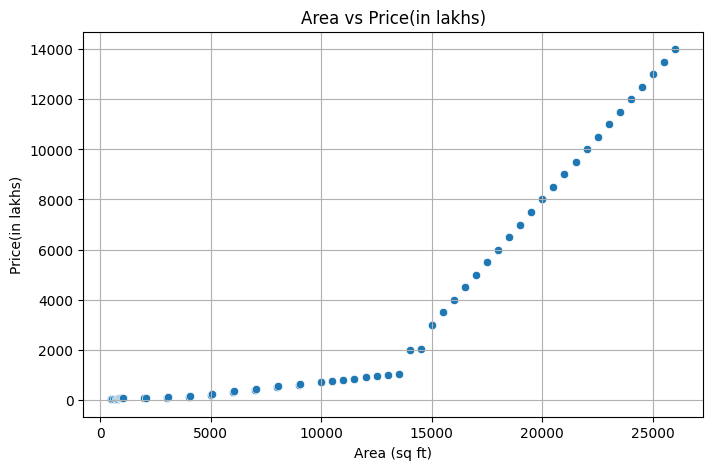

In [15]:
# Scatter plot of Area vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Area", y="Price(in lakhs)")
plt.title("Area vs Price(in lakhs)")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price(in lakhs)")
plt.grid(True)
plt.show()

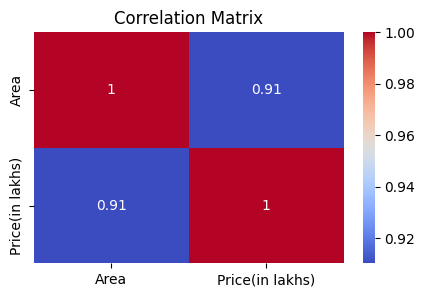

In [16]:
# Correlation heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [17]:
# Feature and target separation
X = df[['Area']]
y = df['Price(in lakhs)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Print slope and intercept
print(f"Slope (Coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Slope (Coefficient): 0.48824648730162196
Intercept: -2213.370720681598


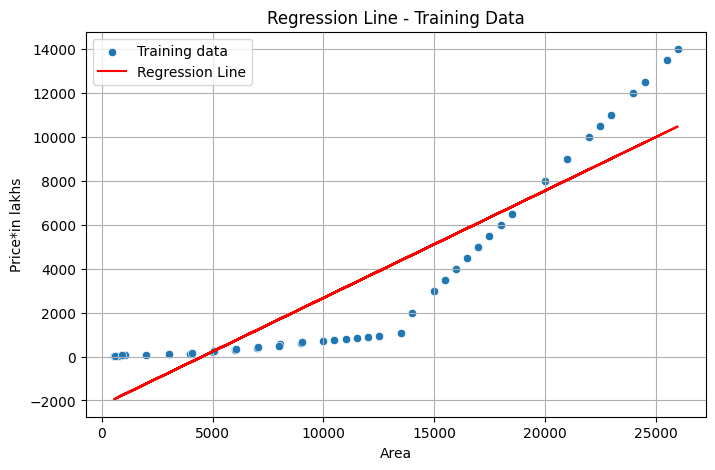

In [20]:
# Plot regression line on training data
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train['Area'], y=y_train, label="Training data")
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel("Area")
plt.ylabel("Price*in lakhs")
plt.title("Regression Line - Training Data")
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error (MSE): 3641494.43
Root Mean Squared Error (RMSE): 1908.27
R-squared Score: 0.84
